#**Multi Class Classification**
~~ Avni Bansal

Weather dataset having 4 classes -> Cloudy, Rain, Shine, Sunrise.

**STRUCTURE in my drive is as follows:**

*Weather* folder has *Train* and *Test* folders. *Train* folder contains the 4 classes. *Test* folder has 4 images fron each class.


**My Vision:** Live updates of weather in america will ensure safety from natural disasters like tornados, extreme heat, flames/smoke from nearby forest fires and likewise. Basic tool for that will be image classification of various weather conditions.


**Colab link -** [https://colab.research.google.com/drive/1xId02cpJ8NJJDhmqBsiNuc5OZIiApnhT#scrollTo=2rGH9W60FOED](https://)



**Dataset link:** [https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset](https://)

---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_path = '/content/drive/MyDrive/Dataset/Weather/Train'

test_path =  '/content/drive/MyDrive/Dataset/Weather/Test'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=100,shuffle = True)

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=10,shuffle=True)

Found 1105 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [5]:
imgs,labels=next(train_batches)

In [6]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

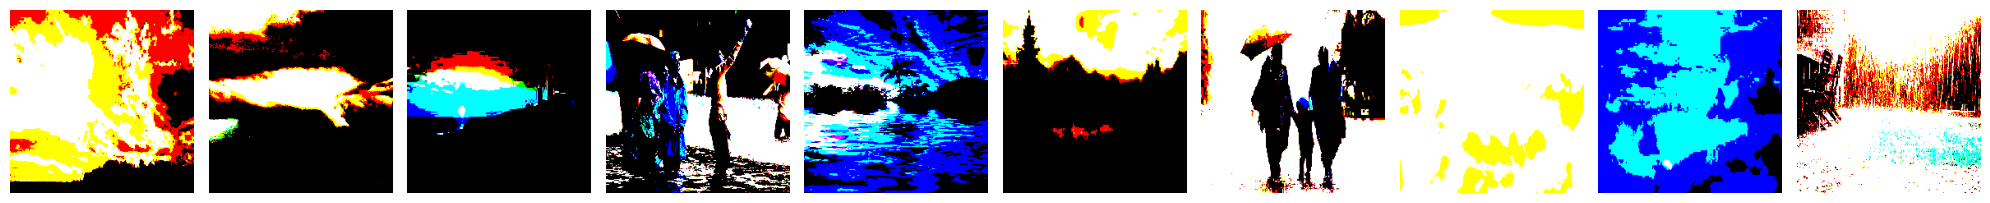

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0.

In [7]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [9]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='tanh',padding='same',input_shape=(224,224,3)), #param=(3*3*3+1)*16
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),  #param=(3*3*16+1)*32
                  MaxPool2D(pool_size=(2,2),strides=2),
                  Flatten(),
                  Dense(units=32,activation='softmax'), #param=size of flatten*4+4
                  Dense(units=4,activation='softmax'), #param=size of flatten*4+4
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 32)                3

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,epochs=10,verbose=1)

Epoch 1/10
12/12 [==============================] - 429s 38s/step - loss: 0.6271 - accuracy: 0.5032
Epoch 2/10
12/12 [==============================] - 9s 789ms/step - loss: 0.6066 - accuracy: 0.6814
Epoch 3/10
12/12 [==============================] - 9s 812ms/step - loss: 0.6031 - accuracy: 0.7041
Epoch 4/10
12/12 [==============================] - 9s 727ms/step - loss: 0.6015 - accuracy: 0.7204
Epoch 5/10
12/12 [==============================] - 9s 786ms/step - loss: 0.5993 - accuracy: 0.7348
Epoch 6/10
12/12 [==============================] - 10s 799ms/step - loss: 0.5977 - accuracy: 0.7439
Epoch 7/10
12/12 [==============================] - 9s 731ms/step - loss: 0.5967 - accuracy: 0.7502
Epoch 8/10
12/12 [==============================] - 9s 704ms/step - loss: 0.5961 - accuracy: 0.7493
Epoch 9/10
12/12 [==============================] - 10s 775ms/step - loss: 0.5946 - accuracy: 0.7629
Epoch 10/10
12/12 [==============================] - 10s 813ms/step - loss: 0.5939 - accuracy: 0.7

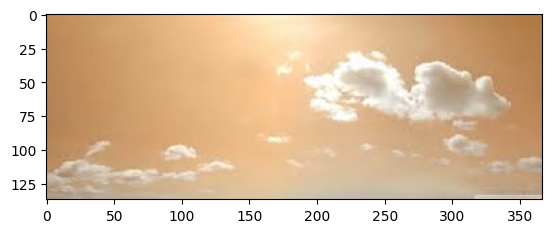

In [13]:
# from test folder importing pics

import cv2
test_img = cv2.imread('/content/drive/MyDrive/Dataset/Weather/Test/Shine/shine253.jpg')
plt.imshow(test_img)

In [14]:
test_img.shape

(137, 367, 3)

In [15]:
test_img = cv2.resize(test_img,(224,224))

In [16]:
test_input = test_img.reshape((1,224,224,3))

In [17]:
#predictions=model.predict(test_img)
predictions=model.predict(x=test_batches,verbose="auto")

2/2 [==============================] - 5s 5s/step


In [18]:
predictions

array([[0.23911141, 0.24801277, 0.27100778, 0.2418681 ],
       [0.23911141, 0.24801277, 0.27100778, 0.2418681 ],
       [0.23919284, 0.24798344, 0.27097633, 0.24184741],
       [0.19938526, 0.23001517, 0.19714884, 0.37345076],
       [0.24173927, 0.24700652, 0.2701009 , 0.24115333],
       [0.25300497, 0.2429751 , 0.26566568, 0.23835425],
       [0.19940433, 0.2300268 , 0.19717883, 0.37339002],
       [0.33435446, 0.2205188 , 0.22230653, 0.22282028],
       [0.19938664, 0.2300148 , 0.19714828, 0.3734503 ],
       [0.23911655, 0.24801086, 0.2710058 , 0.24186677],
       [0.19938488, 0.23001483, 0.19714801, 0.37345228],
       [0.33912298, 0.21896686, 0.22033378, 0.22157635],
       [0.24904972, 0.24432369, 0.26734006, 0.23928659],
       [0.19940136, 0.23001547, 0.19715238, 0.37343082],
       [0.24391098, 0.24616025, 0.26936844, 0.24056032],
       [0.33914584, 0.21908611, 0.22007655, 0.22169156],
       [0.23914084, 0.24800137, 0.2709981 , 0.24185967],
       [0.23911141, 0.24801277,

In [19]:
for [a,b,c,d] in predictions:
  ans = max(max(a,b),max(c,d))
  if(ans==a):
    print('Cloudy')
  elif(ans==b):
    print('Rain')
  elif(ans==c):
    print('Shine')
  elif(ans==d):
    print('Sunrise')



Shine
Shine
Shine
Sunrise
Shine
Shine
Sunrise
Cloudy
Sunrise
Shine
Sunrise
Cloudy
Shine
Sunrise
Shine
Cloudy
Shine
Shine
Shine
Sunrise


In [20]:
imgs1,labels1=next(test_batches)

In [21]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

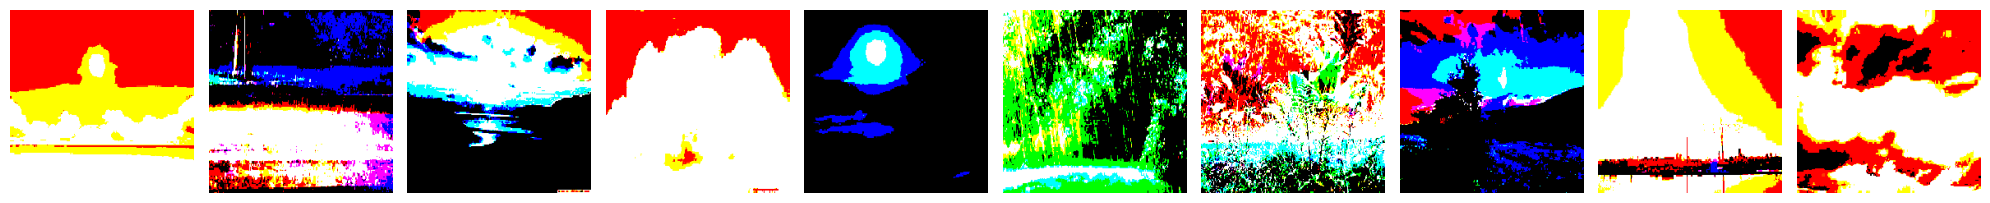

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [22]:
import matplotlib.pyplot as plt

plotImages(imgs1)
print(labels1)

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [25]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")



    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[0 0 4 1]
 [1 0 2 2]
 [1 0 2 2]
 [1 0 3 1]]


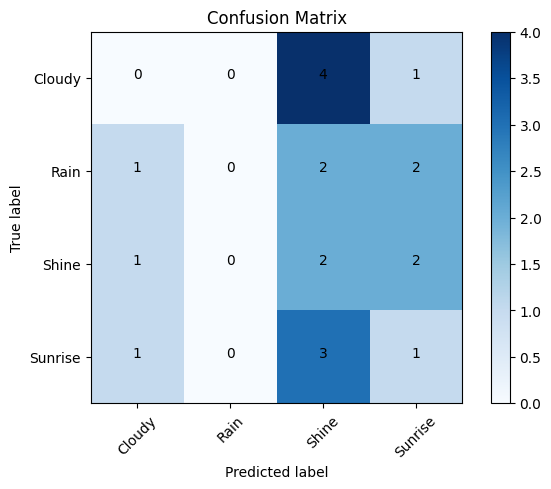

In [27]:
cm_plot_labels=['Cloudy','Rain','Shine','Sunrise']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')